# Regularization and ML vs. MAP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import textwrap
%matplotlib inline  


In [2]:
def generateData(N, l, u, gVar):
	'''generateData(N, l, u, gVar): Generate N 
    uniformly spaced data points in the range [l,u) with 
    zero-mean Gaussian random noise with variance gVar'''
	# x = np.random.uniform(l,u,N)
	step = (u-l)/(N);
	x = np.arange(l+step/2,u+step/2,step)
	e = np.random.normal(0,gVar,N)
	t = np.sin(2*math.pi*x) + e
	return x,t

def fitdataReg(x,t,M,la):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X+(la*np.identity(M+1)))@X.T@t
	return w

def plotPoly(x,t,w,l,u,subplotloc,la=0):
	'''plotPoly(x,t,w,l,u,subplotloc): Plot data (x,t) and the
    polynomial with parameters w across the range [l,u) in a sub-figure
    at location subplotloc'''
	xrange = np.arange(l,u,0.001)  #get equally spaced points in the xrange
	y = np.sin(2*math.pi*xrange) #compute the true function value
	X = np.array([xrange**m for m in range(w.size)]).T
	esty = X@w #compute the predicted value
    
	plt.subplot(*subplotloc) #identify the subplot to use
	plt.tight_layout()
	p1 = plt.plot(xrange, y, 'g') #plot true value
	p2 = plt.plot(x, t, 'bo') #plot training data
	p3 = plt.plot(xrange, esty, 'r') #plot estimated value

	#add title, legend and axes labels
	plt.ylabel('t') #label x and y axes
	plt.xlabel('x')
	plt.rcParams["axes.titlesize"] = 10
	myTitle = 'Plot of data, true function, and estimated polynomial with order M = ' + str(w.size-1) + ', N =' + str(x.size) + ', lambda =' + str(la)
	fig.add_subplot(*subplotloc).set_title("\n".join(textwrap.wrap(myTitle, 50)))
	plt.legend((p1[0],p2[0],p3[0]),('True Function', 'Training Data', 'Estimated\nPolynomial'), fontsize=6)



[  5.84863734e+00  -2.88368132e+02   4.39126144e+03  -2.98375651e+04
   1.08540560e+05  -2.20350165e+05   2.25708404e+05  -3.85652901e+04
  -1.51561255e+05   1.42922560e+05  -4.09697226e+04]
[ -0.42170139  18.64997922 -55.4748854   44.8348285   -7.62994219]


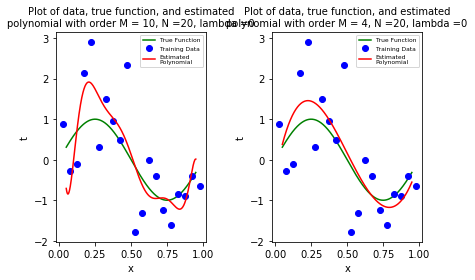

In [3]:
	fig = plt.figure();
	x,t = generateData(20,0,1,1)  #Generate data
	w = fitdataReg(x,t,10,0)
	print(w)
	plotPoly(x,t,w,0.05,.95,[1,2,1]) 

	w = fitdataReg(x,t,4,0)
	print(w)
	plotPoly(x,t,w,0.05,.95,[1,2,2]) 

	plt.show();

In [ ]:
def plotBeta(a=2,b=2):
	'''plotBeta(a=1,b=1): Plot plot beta distribution with parameters a and b'''
	xrange = np.arange(0,1,0.001)  #get equally spaced points in the xrange
	normconst = math.gamma(a+b)/(math.gamma(a)*math.gamma(b))
	beta = normconst*xrange**(a-1)*(1-xrange)**(b-1)
	fig = plt.figure()
	p1 = plt.plot(xrange,beta, 'g')
	plt.show()


#Beta Distribution
plotBeta(2,4);

trueMu = 0.5
numFlips = 10
priorA = 2
priorB = 2
flipResult = []
for flip in range(numFlips):
    flipResult.append(np.random.binomial(1,trueMu,1)[0])
    print(flipResult)
    print('Frequentist/Maximum Likelihood Probability of Heads:' + str(sum(flipResult)/len(flipResult)))
    print('Bayesian/MAP Probability of Heads:' + str((sum(flipResult)+priorA-1)/(len(flipResult)+priorA+priorB-2)))
    input("Hit enter to continue...\n")